![seaborn](https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2018/07/seaborn.png) 
# The good, the bad, the seaborn


#### Whats wrong with this data visualization? (hint: so many things)

<img src="https://pbs.twimg.com/media/DNTFhGaXcAEbrMO.jpg" width=800>

Learning goals:
- Create a list of best practices for data visualization
- Identify the differences between matplotlib and seaborn
- Create a visualization with seaborn, applying best practices

## Goal 1: Create a list of best practices for data visualization

Documenting best practices:

In groups:
- Group 1: [article 1](https://www.jackhagley.com/What-s-the-difference-between-an-Infographic-and-a-Data-Visualisation)
- Group 2: [article 2](https://thoughtbot.com/blog/analyzing-minards-visualization-of-napoleons-1812-march)
- Group 3: [article 3](http://dataremixed.com/2016/04/the-design-of-everyday-visualizations/)
- Group 4: [article 4](https://visme.co/blog/data-storytelling-tips/)
- Group 5: [article 5](files/VisualizationsThatReallyWork.pdf)

To fill in: [Best practices deck](https://docs.google.com/presentation/d/1KTi7FbCpFsnNW4rxFV5GxB2sNnvpcXe75Fr3jZMJHio/edit?usp=sharing) 

## Goal 2:  Identify differences between seaborn & matplotlib


### Two code examples to accomplish the same plot:

**Resources:**
- [python graph gallery on seaborn](https://python-graph-gallery.com/seaborn/)
- [seaborn](https://seaborn.pydata.org/)


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

# Load in data
tips = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")


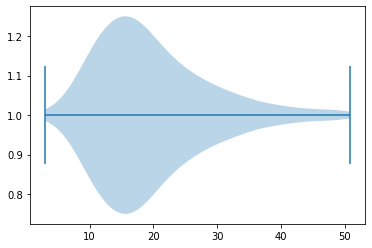

In [2]:
# Matplotlib:

# Initialize Figure and Axes object
fig, ax = plt.subplots()

# Create violinplot
ax.violinplot(tips["total_bill"], vert=False)

# Show the plot
plt.show()

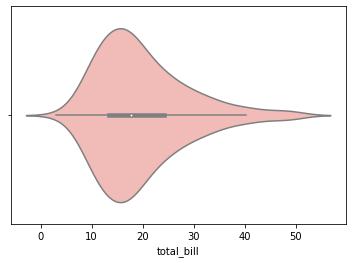

In [4]:
# Seaborn:

import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
tips = sns.load_dataset("tips")
# tips = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

# Create violinplot
# sns.violinplot(x = "total_bill", data=tips)
sns.violinplot(x = "total_bill", data=tips,palette="Pastel1")

# Show the plot
plt.show()

### In depth comparison:

#### Groups 1:3

For each plot:
- How is the code to create it different from the maplotlib code?
- What are the customization options? 
- What are the top 3 most important customization options to know(with code) ?

Group 1 - [histograms](https://python-graph-gallery.com/histogram/)<br>
Group 2 - [scatter plot](https://python-graph-gallery.com/scatter-plot/)<br>
Group 3 - [boxplot](http://python-graph-gallery.com/boxplot/)<br>

#### Groups 4:5
- What new vocabulary was introduced in these posts?
- What is the benefit of these new options?
- What code/options do you need to know? 

Group 4 - [diverging, sequential, discrete color palattes](https://python-graph-gallery.com/101-make-a-color-palette-with-seaborn/)<br>
Group 5 - [seaborn themes](https://python-graph-gallery.com/104-seaborn-themes/) <br>

_Time to work:_ 15 minutes <br>
_Time to discuss as large group:_ 10 minutes

## Goal 3: Create a visualization with seaborn, applying best practices

[exercise from data world](https://data.world/makeovermonday/2018w37-paying-the-president)


In [30]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/5qxp2ldwsel3ow2pq5mkvfas2rfaup',converters={'date':pd.to_datetime})
df.head()

,type,source,date,amount,purpose_scrubbed,property_scrubbed,purpose,property,city,state
0,FEC,"Donald J. Trump for President, Inc.",2016-04-01,9000.00,Rent,Trump Plaza LLC,RENT,TRUMP PLAZA LLC,New York,NY
1,FEC,"Donald J. Trump for President, Inc.",2016-04-01,6000.00,Rent,Trump CPS LLC,RENT,TRUMP CPS LLC,New York,NY
2,FEC,"Donald J. Trump for President, Inc.",2017-04-01,39816.67,Rent,Trump Tower Commercial LLC,RENT,TRUMP TOWER COMMERCIAL LLC,Hicksville,NY
3,FEC,"Donald J. Trump for President, Inc.",2017-04-01,1000.00,Rent,Trump Restaurants LLC,RENT,TRUMP RESTAURANTS LLC,New York,NY
4,government,Department of Defense,2017-04-10,1422.00,Lodging,Trump Hotel Panama,Hotels-Lodging,Trump International Hotel & Tower Panama,Panama City,Panama


## Reflection:

- What worked from this training? 
- What can you apply moving forward?
- What's one concept you would like to practice more?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 10 columns):
type                 1193 non-null object
source               1193 non-null object
date                 1188 non-null object
amount               1193 non-null float64
purpose_scrubbed     1193 non-null object
property_scrubbed    1193 non-null object
purpose              1182 non-null object
property             1193 non-null object
city                 1160 non-null object
state                1158 non-null object
dtypes: float64(1), object(9)
memory usage: 93.3+ KB


In [9]:
df.type.value_counts()

FEC           841
government    352
Name: type, dtype: int64

#### For extra fun:
[visualization challenges](http://www.storytellingwithdata.com/blog/2019/3/1/swdchallenge-visualize-this-data)

[seaborn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

In [10]:
df.purpose_scrubbed.value_counts()

Lodging    438
Food       259
Event      155
Payroll    111
Rent        89
Travel      69
Other       65
Legal        7
Name: purpose_scrubbed, dtype: int64

,type,source,date,amount,purpose_scrubbed,property_scrubbed,purpose,property,city,state
1188,government,Department of State,NaN,10398.33,Other,Trump Golf Club Doonberg,NaN,Trump International Golf Links and Hotel Ireland,Doonberg,Ireland
1189,government,Department of State,NaN,7724.72,Other,Trump Golf Resort Scotland,NaN,Trump Turnberry,Turnberry,Scotland
1190,government,Department of State,NaN,5583.13,Other,Trump Golf Resort Scotland,NaN,Trump Turnberry,Turnberry,Scotland
1191,government,Department of State,NaN,4853.29,Other,Trump Hotel Vancouver,NaN,Trump International Hotel & Tower Vancouver,Vancouver,British Columbia
1192,government,Department of State,NaN,592.13,Other,Trump Golf Club Doonberg,NaN,Trump International Golf Links and Hotel Ireland,Doonberg,Ireland


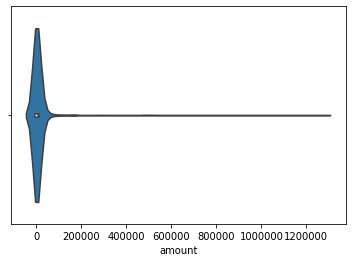

In [16]:
sns.violinplot(df.amount)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


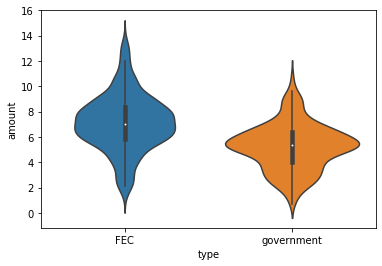

In [18]:
sns.violinplot(df.type,np.log(df.amount))

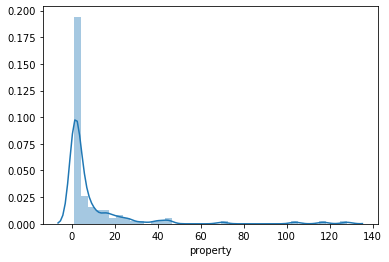

In [20]:
sns.distplot(df.property.value_counts())

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


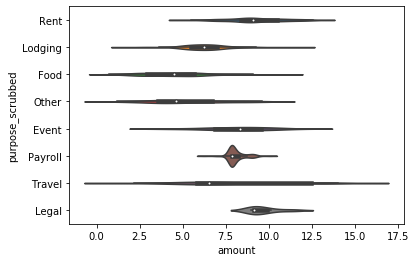

In [23]:
sns.violinplot(np.log(df.amount),df.purpose_scrubbed)

Let's try to copy the proPublica chart (at least a little).
![title](propublica_trump_emoluments.png)

We need a month-year column, and a log-payments column, and a source_category column. (Obviously we could just do these things dynamically but let's make this easier on ourselves).

In [37]:
df['month_year'] = df.date.dt.strftime('%Y-%m')

In [38]:
df.head()

,type,source,date,amount,purpose_scrubbed,property_scrubbed,purpose,property,city,state,month_year
0,FEC,"Donald J. Trump for President, Inc.",2016-04-01,9000.00,Rent,Trump Plaza LLC,RENT,TRUMP PLAZA LLC,New York,NY,2016-04
1,FEC,"Donald J. Trump for President, Inc.",2016-04-01,6000.00,Rent,Trump CPS LLC,RENT,TRUMP CPS LLC,New York,NY,2016-04
2,FEC,"Donald J. Trump for President, Inc.",2017-04-01,39816.67,Rent,Trump Tower Commercial LLC,RENT,TRUMP TOWER COMMERCIAL LLC,Hicksville,NY,2017-04
3,FEC,"Donald J. Trump for President, Inc.",2017-04-01,1000.00,Rent,Trump Restaurants LLC,RENT,TRUMP RESTAURANTS LLC,New York,NY,2017-04
4,government,Department of Defense,2017-04-10,1422.00,Lodging,Trump Hotel Panama,Hotels-Lodging,Trump International Hotel & Tower Panama,Panama City,Panama,2017-04


In [76]:
amounts = [400,1000,10500]
list(map(lambda amount: floor(np.log(amount)/np.log(10)),amounts))

NameError: name 'floor' is not defined

In [100]:
df[df.amount < 0]

,type,source,date,amount,purpose_scrubbed,property_scrubbed,purpose,property,city,state,month_year,amount_size
367,FEC,"Donald J. Trump for President, Inc.",2017-02-21,-428.53,Other,The Trump Corporation,VOIDED CHECK: SERVICES NOT RENDERED,THE TRUMP CORPORATION,New York,NY,2017-02,NaN
368,FEC,"Donald J. Trump for President, Inc.",2017-02-21,-828.26,Other,Trump Ice LLC,VOIDED CHECK: OVERPAYMENT,TRUMP ICE LLC,New York,NY,2017-02,NaN
740,FEC,"Donald J. Trump for President, Inc.",2017-03-16,-11541.20,Event,Trump Golf Club Miami,AMEX: REFUND: FACILITY RENTAL [SB23.728560],TRUMP NATIONAL DORAL,Doral,FL,2017-03,NaN


We probably should have a way of voiding entries that have a corresponding negative entry.

In [95]:
def size_cat(amount):
    if amount <= 0: return np.NaN 
    log = np.floor(np.log(amount)/np.log(10))
    if log < 3:
        return 0
    elif log < 4:
        return 1
    elif log < 5:
        return 2
    elif log < 6:
        return 3
    else:
        return 4
    
df.amount.map(size_cat).value_counts()



0.0    703
1.0    366
2.0     88
3.0     32
4.0      1
Name: amount, dtype: int64

In [96]:
df['amount_size'] = df.amount.map(size_cat)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 12 columns):
type                 1193 non-null object
source               1193 non-null object
date                 1188 non-null datetime64[ns]
amount               1193 non-null float64
purpose_scrubbed     1193 non-null object
property_scrubbed    1193 non-null object
purpose              1182 non-null object
property             1193 non-null object
city                 1160 non-null object
state                1158 non-null object
month_year           1193 non-null object
amount_size          1190 non-null float64
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 111.9+ KB
